                                          facebook review sentiment Analysis using python.

In [13]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [14]:
data =pd.read_csv("C:/Users/hp/.vscode/Ml projects/facebook sentiment analysis/facebook_data (2).csv")
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,Awsome sound powerful bass battery backup is a...,5


In [15]:
print(data.isnull().sum())


review    0
rating    0
dtype: int64


In [16]:
from multiprocessing.resource_sharer import stop
import nltk
import re
nltk.download('stopwords')
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopwords=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
def clean(text):
  text=str(text).lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('https?://\S+|www\.\S+','',text)
  text=re.sub('<.*?>+','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\n','',text)
  text=re.sub('\w*\d\w*','',text)
  text=[word for word in text.split(' ') if word not in stopwords]
  text=" ".join(text)
  text= [stemmer.stem(word) for word in text.split(' ')]
  text=" ".join(text)
  return text

In [18]:
data['review']= data['review'].apply(clean)
data.head()

,review,rating
0,nice produt like design lot easi carri look...,5
1,awesom soundveri pretti see nd sound qualiti g...,5
2,awesom sound qualiti pros hrs batteri life in...,4
3,think good product per qualiti also design qui...,5
4,awsom sound power bass batteri backup also exc...,5


In [19]:
ratings= data['rating'].value_counts()
numbers=ratings.index
quantity=ratings.values

import plotly.express as px
""
figure= px.pie(data,
               values=quantity,
               names=numbers, hole=0.5)
figure.show()

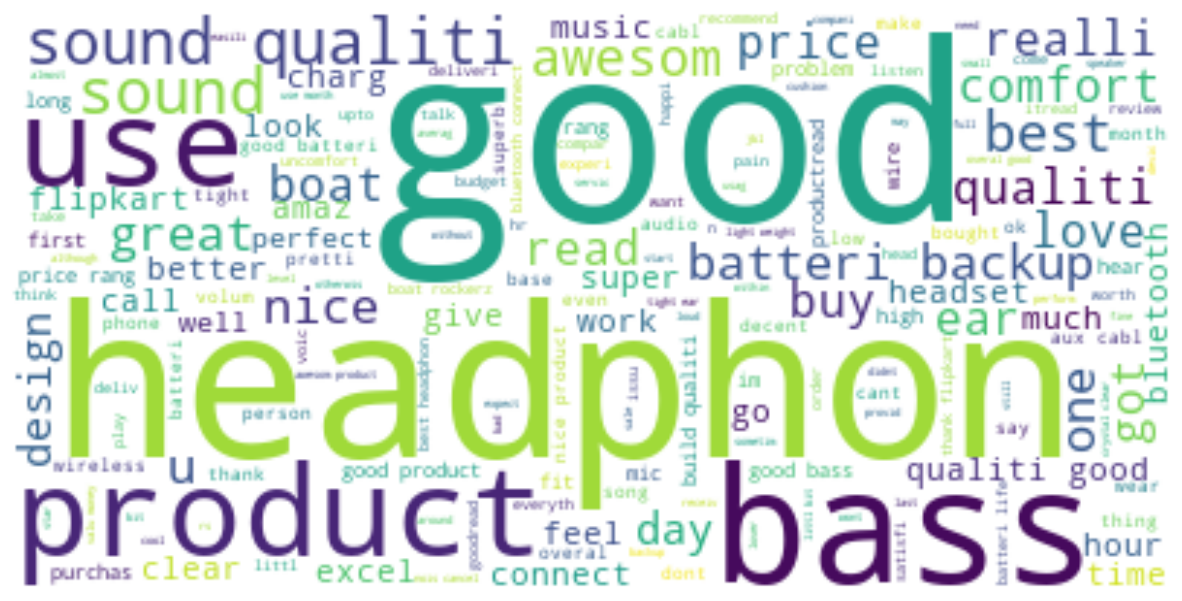

In [20]:
text= " ".join(i for i in data.review)
stopwords=set(STOPWORDS)
wordcloud= WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [21]:
nltk.download('vader_lexicon')
sentiments= SentimentIntensityAnalyzer()
data["Positive"]=[sentiments.polarity_scores(i)["pos"] for i in data['review']]
data["Negative"]=[sentiments.polarity_scores(i)["neg"] for i in data['review']]
data["Neutral"]=[sentiments.polarity_scores(i)["neu"] for i in data['review']]

data=data[['review','Positive','Negative','Neutral']]
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review,Positive,Negative,Neutral
0,nice produt like design lot easi carri look...,0.431,0.000,0.569
1,awesom soundveri pretti see nd sound qualiti g...,0.471,0.000,0.529
2,awesom sound qualiti pros hrs batteri life in...,0.194,0.000,0.806
3,think good product per qualiti also design qui...,0.393,0.049,0.558
4,awsom sound power bass batteri backup also exc...,0.479,0.029,0.492


In [22]:

x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

def sentiment_score(a,b,c):
  if (a>b) and (a>c):
    print("Positive")
  elif (b>a) and (b>c):
    print("Negative")
  else:
    print("Neutral")
  
sentiment_score(x,y,z)


Neutral


In [23]:
print("Positive: ",x)
print("Negative: ",y)
print("Neutral: ",z)

Positive:  179.51100000000017
Negative:  17.466999999999995
Neutral:  292.02299999999985
